In [3]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [26]:
# Read CSV created from APIs
# Census data combined with crime data
datafile = "Data/censuscrimedata.csv"
censusCrimeData = pd.read_csv(datafile)
del censusCrimeData['State']
del censusCrimeData['Unnamed: 0']
censusCrimeData.head()

,State Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Violent Crime Count,Crime Rate
0,Alabama,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,2.708946,9504.0,0.194904
1,Alaska,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,3.637114,6343.0,0.860572
2,Arizona,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,2.778676,31198.0,0.442506
3,Arkansas,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,2.349860,17096.0,0.569986
4,California,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,3.052765,173298.0,0.441147


In [5]:
censusCrimeData['Population'].max()

39283497.0

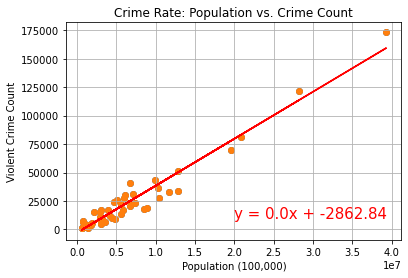

In [6]:
# Show Crime Rate as Crime Count vs. Population
plt.scatter(censusCrimeData['Population'],censusCrimeData['Violent Crime Count'])
# Add the linear regression equation and line to plot
plt.title("Crime Rate: Population vs. Crime Count")
x_values = censusCrimeData['Population']
y_values = censusCrimeData['Violent Crime Count']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20000000,10000),fontsize=15,color="red")
plt.xlabel('Population (100,000)')
plt.ylabel('Violent Crime Count')
plt.grid()
# plt.savefig('Output/crimerate-PopVsCrimeCount.png', bbox_inches="tight")

# x = [0, 5, 10, 15, 20, 25, 30, 35, 40000000]
# default_x_ticks = range(len(x))
# plt.xticks(default_x_ticks, x)
# plt.subplots_adjust(left=0.25)
plt.show()

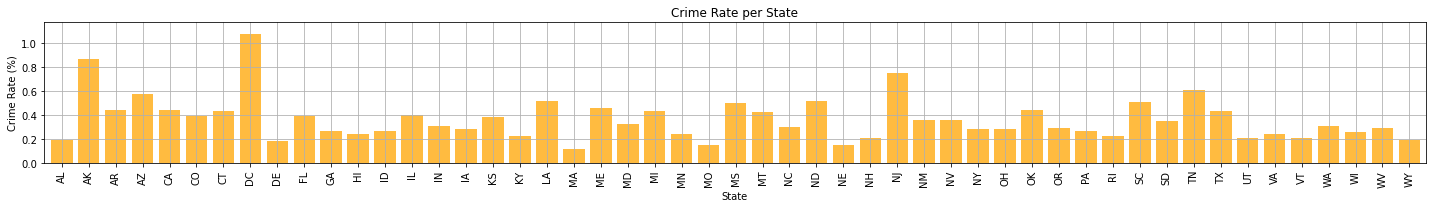

In [7]:
# Bar chart illustrating crime rate per state
stateAbbs = ['AL', 'AK', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS',
            'KY', 'LA', 'MA', 'ME', 'MD', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 
            'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
# Set x axis and tick locations
x_axis = np.arange(len(stateAbbs))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, censusCrimeData["Crime Rate"], color='orange', alpha=0.75, align="edge")
plt.xticks(tick_locations, stateAbbs, rotation="vertical")
plt.grid()

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(censusCrimeData["Crime Rate"])+.1)

# Set a Title and labels
plt.title("Crime Rate per State")
plt.xlabel("State")
plt.ylabel("Crime Rate (%)")

# Save our graph and show the grap
plt.tight_layout()
# plt.savefig("Output/CrimeRatePerState.png")
plt.show()

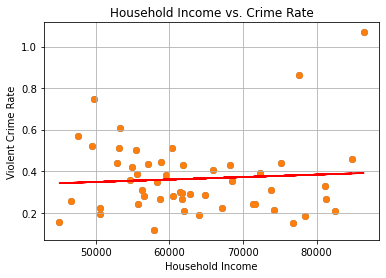

In [8]:
plt.scatter(censusCrimeData['Household Income'],censusCrimeData['Crime Rate'])

# Add the linear regression equation and line to plot
x_values = censusCrimeData['Household Income']
y_values = censusCrimeData['Crime Rate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(45000,6000),fontsize=15,color="red")
plt.title("Household Income vs. Crime Rate")
plt.xlabel('Household Income')
plt.ylabel('Violent Crime Rate')
plt.grid()
plt.savefig('Output/crimeVsHouseIncome.png', bbox_inches="tight")
plt.show()

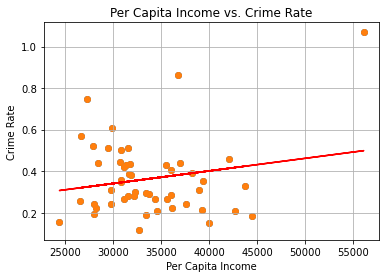

In [9]:
plt.scatter(censusCrimeData['Per Capita Income'],censusCrimeData['Crime Rate'])

# Add the linear regression equation and line to plot
x_values = censusCrimeData['Per Capita Income']
y_values = censusCrimeData['Crime Rate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(450,60),fontsize=15,color="red")
plt.title("Per Capita Income vs. Crime Rate")
plt.xlabel('Per Capita Income')
plt.ylabel('Crime Rate')
plt.grid()
plt.savefig('Output/crimeVsPerCapitaIncome.png', bbox_inches="tight")
plt.show()

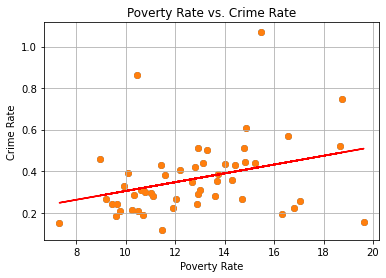

The r-value is: 0.3247255888412339


In [25]:
# Poverty Rate Versus Crime Rate
plt.scatter(censusCrimeData['Poverty Rate'],censusCrimeData['Crime Rate'])

# Add the linear regression equation and line to plot
x_values = censusCrimeData['Poverty Rate']
y_values = censusCrimeData['Crime Rate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(450,60),fontsize=15,color="red")
plt.title("Poverty Rate vs. Crime Rate")
plt.xlabel('Poverty Rate')
plt.ylabel('Crime Rate')
plt.grid()
plt.savefig('Output/crimeVsPoverty.png', bbox_inches="tight")
plt.show()

print(f"The r-value is: {rvalue}")

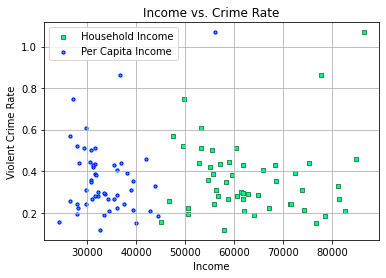

In [18]:
# Plot income on same axis

# plt.scatter(censusCrimeData['Household Income'],censusCrimeData['Crime Rate'])

# Add the linear regression equation and line to plot
x1 = censusCrimeData['Household Income']
x2 = censusCrimeData['Per Capita Income']
y = censusCrimeData['Crime Rate']

figIncome = plt.figure()
ax1 = figIncome.add_subplot(111)

ax1.scatter(x1, y, s=10, c='springgreen', edgecolor='seagreen', marker="s", label='Household Income')
ax1.scatter(x2,y, s=10, c='deepskyblue', edgecolor='b', marker="o", label='Per Capita Income')

plt.legend(loc='upper left')
plt.title("Income vs. Crime Rate")
plt.xlabel('Income')
plt.ylabel('Violent Crime Rate')
plt.grid()
plt.savefig('Output/crimeVsCombinedIncome.png', bbox_inches="tight")
plt.show()

In [27]:
# Remove outlier (DC) and see if trends change
noDCdf = censusCrimeData.drop([7])

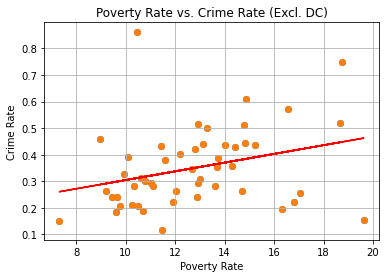

The r-value is: 0.30040947950587876


In [24]:
# Poverty Rate vs. Crime Rate -- ignoring DC

# Poverty Rate Versus Crime Rate
plt.scatter(noDCdf['Poverty Rate'],noDCdf['Crime Rate'])

# Add the linear regression equation and line to plot
x_values = noDCdf['Poverty Rate']
y_values = noDCdf['Crime Rate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(450,60),fontsize=15,color="red")
plt.title("Poverty Rate vs. Crime Rate (Excl. DC)")
plt.xlabel('Poverty Rate')
plt.ylabel('Crime Rate')
plt.grid()
plt.savefig('Output/crimeVsPoverty-noDC.png', bbox_inches="tight")
plt.show()

print(f"The r-value is: {rvalue}")

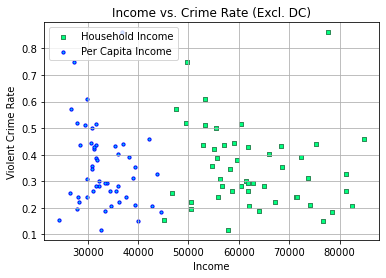

In [23]:
# Plot income on same axis -- Excluding DC

# plt.scatter(censusCrimeData['Household Income'],censusCrimeData['Crime Rate'])

# Add the linear regression equation and line to plot
x1 = noDCdf['Household Income']
x2 = noDCdf['Per Capita Income']
y = noDCdf['Crime Rate']

figIncome = plt.figure()
ax1 = figIncome.add_subplot(111)

ax1.scatter(x1, y, s=10, c='springgreen', edgecolor='seagreen', marker="s", label='Household Income')
ax1.scatter(x2,y, s=10, c='deepskyblue', edgecolor='b', marker="o", label='Per Capita Income')

plt.legend(loc='upper left')
plt.title("Income vs. Crime Rate (Excl. DC)")
plt.xlabel('Income')
plt.ylabel('Violent Crime Rate')
plt.grid()
plt.savefig('Output/crimeVsCombinedIncome-noDC.png', bbox_inches="tight")
plt.show()

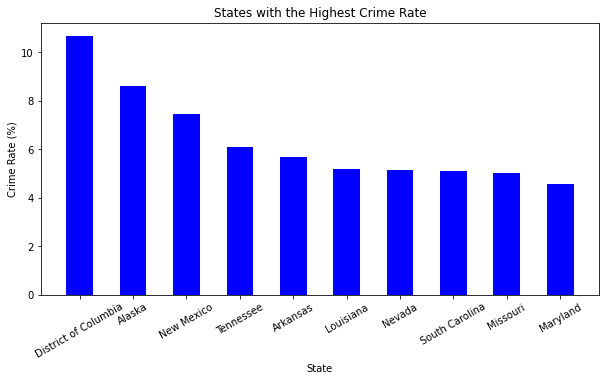

In [28]:
# Crime Vs. Unemployment (Brandon's work)

data_dict = {'District of Columbia':10.687428, 'Alaska':8.605719, 'New Mexico':7.471132,'Tennessee':6.093431, 
             'Arkansas':5.699864, 'Louisiana':5.186561,'Nevada':5.136957, 'South Carolina':5.108542, 'Missouri':5.008755,
             'Maryland':4.571307}
state = list(data_dict.keys())
unemployment = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))

plt.bar(state, unemployment, color ='blue',
        width = 0.5)
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("State")
plt.ylabel("Crime Rate (%)")
plt.title("States with the Highest Crime Rate")
# plt.savefig('Output/bj_crimerate_bar.png')
plt.show()

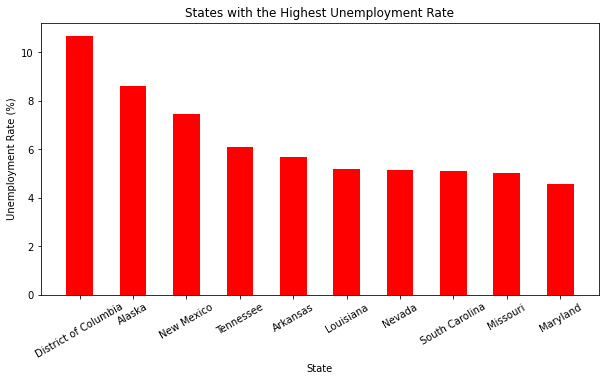

In [29]:
# States with the Highest Unemployment Rate

fig = plt.figure(figsize = (10, 5))

plt.bar(state, unemployment, color ='red',
        width = 0.5)
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("State")
plt.ylabel("Unemployment Rate (%)")
plt.title("States with the Highest Unemployment Rate")
# plt.savefig('Output/bj_unemployment_bar.png')
plt.show()

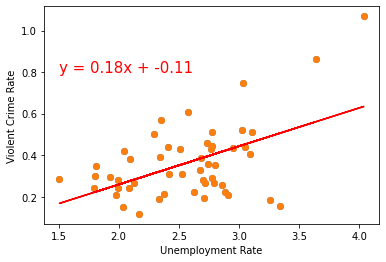

In [32]:
# Unemployment Rate

plt.scatter(censusCrimeData['Unemployment Rate'],censusCrimeData['Crime Rate'])

# Add the linear regression equation and line to plot
x_values = censusCrimeData['Unemployment Rate']
y_values = censusCrimeData['Crime Rate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1.5,.8),fontsize=15,color="red")
plt.xlabel('Unemployment Rate')
plt.ylabel('Violent Crime Rate')
# plt.savefig('Output/bj_unemploymentscatter.png')
plt.show()

In [33]:
correlation = st.pearsonr(x_values, y_values)
correlation

(0.5129600852334537, 0.00011866951928116001)